In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/no_pymc')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_mtdreamzs_5chain_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 5):
        traces[trace].append(np.load('earm_mtdreamzs_5chain_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))
traces

{'a': [array([[ -5.50015661, -12.57873148,  -2.74352331, ...,   3.08390736,
           -5.1005849 ,   3.85288214],
         [ -5.50015661, -12.57873148,  -2.74352331, ...,   3.08390736,
           -5.1005849 ,   3.85288214],
         [ -5.50015661, -12.57873148,  -2.74352331, ...,   3.08390736,
           -5.1005849 ,   3.85288214],
         ..., 
         [  1.89757369,  -3.4995345 ,   6.28318779, ...,   2.21464557,
           -6.4908171 ,   2.43174117],
         [  1.89757369,  -3.4995345 ,   6.28318779, ...,   2.21464557,
           -6.4908171 ,   2.43174117],
         [  1.89757369,  -3.4995345 ,   6.28318779, ...,   2.21464557,
           -6.4908171 ,   2.43174117]]),
  array([[  1.24247586,  -5.5595491 ,  13.98577465, ...,   2.78975996,
           -6.3956498 ,   4.6795909 ],
         [  1.24247586,  -5.5595491 ,  13.98577465, ...,   2.78975996,
           -6.3956498 ,   4.6795909 ],
         [  1.24247586,  -5.5595491 ,  13.98577465, ...,   2.78975996,
           -6.3956498 ,   4

In [5]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_mtdreamzs_5chain_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 5):
        logps[trace].append(np.load('earm_mtdreamzs_5chain_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]
logps

Logp of trace:  a  chain: 0 =  [[-817647.13090278]
 [-817647.13090278]
 [-817647.13090278]
 ..., 
 [  -4770.08208044]
 [  -4770.08208044]
 [  -4770.08208044]]
Logp of trace:  a  chain:  1  =  [-4978.61686649]
Logp of trace:  a  chain:  2  =  [-5004.87674632]
Logp of trace:  a  chain:  3  =  [-5007.78836247]
Logp of trace:  a  chain:  4  =  [-4972.87295218]
Logp of trace:  b  chain: 0 =  [[-783448.732474  ]
 [-783448.732474  ]
 [-783448.732474  ]
 ..., 
 [  -4884.35452639]
 [  -4884.35452639]
 [  -4884.35452639]]
Logp of trace:  b  chain:  1  =  [-4955.74972334]
Logp of trace:  b  chain:  2  =  [-4980.29872079]
Logp of trace:  b  chain:  3  =  [-4959.43724991]
Logp of trace:  b  chain:  4  =  [-4991.06697376]
Logp of trace:  c  chain: 0 =  [[-1004389.17639142]
 [-1004389.17639142]
 [-1004389.17639142]
 ..., 
 [   -5002.95370575]
 [   -5002.95370575]
 [   -5002.95370575]]
Logp of trace:  c  chain:  1  =  [-4961.63535089]
Logp of trace:  c  chain:  2  =  [-4762.90355293]
Logp of trace:  c

{'a': [array([[-817647.13090278],
         [-817647.13090278],
         [-817647.13090278],
         ..., 
         [  -4770.08208044],
         [  -4770.08208044],
         [  -4770.08208044]]), array([[-814417.83713018],
         [-814417.83713018],
         [-814417.83713018],
         ..., 
         [  -4978.61686649],
         [  -4978.61686649],
         [  -4978.61686649]]), array([[-814417.83713018],
         [-814417.83713018],
         [-814417.83713018],
         ..., 
         [  -5004.87674632],
         [  -5004.87674632],
         [  -5004.87674632]]), array([[-814417.83713018],
         [-814417.83713018],
         [-814417.83713018],
         ..., 
         [  -5007.78836247],
         [  -5007.78836247],
         [  -5007.78836247]]), array([[-814417.83713018],
         [-814414.9736531 ],
         [-813734.27588415],
         ..., 
         [  -4972.87295218],
         [  -4972.87295218],
         [  -4972.87295218]])], 'b': [array([[-783448.732474  ],
         [-783

In [6]:
param_trace_dicts = {}
param_trace_dict_a = {}
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
param_trace_dicts

{'a': {'assemble_pore_sequential_Bak_2_kf': [array([-5.0945255 , -5.0945255 , -5.0945255 , ..., -6.18700344,
          -6.18700344, -6.18700344]),
   array([-6.27103413, -6.27103413, -6.27103413, ..., -7.45511325,
          -7.45511325, -7.45511325]),
   array([-6.27103413, -6.27103413, -6.27103413, ..., -6.61717622,
          -6.61717622, -6.61717622]),
   array([-6.27103413, -6.27103413, -6.27103413, ..., -6.36839692,
          -6.36839692, -6.36839692]),
   array([-6.27103413, -6.27103413, -6.27103413, ..., -6.48891584,
          -6.48891584, -6.48891584])],
  'assemble_pore_sequential_Bak_2_kr': [array([-5.74808832, -5.74808832, -5.74808832, ..., -5.7980161 ,
          -5.7980161 , -5.7980161 ]),
   array([-4.03635799, -4.03635799, -4.03635799, ..., -5.38185622,
          -5.38185622, -5.38185622]),
   array([-4.03635799, -4.03635799, -4.03635799, ..., -5.78851703,
          -5.78851703, -5.78851703]),
   array([-4.03635799, -4.03635799, -4.03635799, ..., -4.02370208,
          -4.

In [7]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  97  of  105  parameters.
Percent of parameters with GR below 1.2:  92.380952381
Number of parameters with GR below 1.1:  95  of  105  parameters.
Percent of parameters with GR below 1.1:  90.4761904762


[97, 92.38095238095238, 95, 90.47619047619048]

In [8]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  97  of  105  parameters.
Percent of parameters with GR below 1.2:  92.380952381
Number of parameters with GR below 1.1:  95  of  105  parameters.
Percent of parameters with GR below 1.1:  90.4761904762


[97, 92.38095238095238, 95, 90.47619047619048]

In [9]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  97  of  105  parameters.
Percent of parameters with GR below 1.2:  92.380952381
Number of parameters with GR below 1.1:  95  of  105  parameters.
Percent of parameters with GR below 1.1:  90.4761904762


[97, 92.38095238095238, 95, 90.47619047619048]

In [10]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  97  of  105  parameters.
Percent of parameters with GR below 1.2:  92.380952381
Number of parameters with GR below 1.1:  95  of  105  parameters.
Percent of parameters with GR below 1.1:  90.4761904762


[97, 92.38095238095238, 95, 90.47619047619048]

60000
5
60000


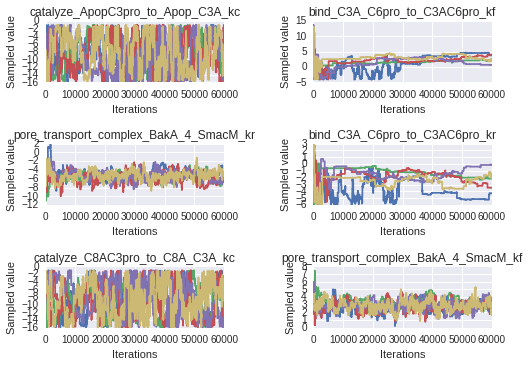

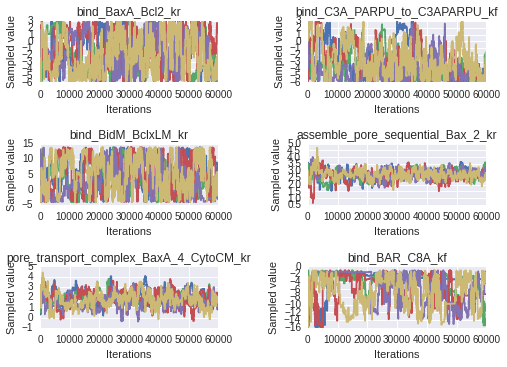

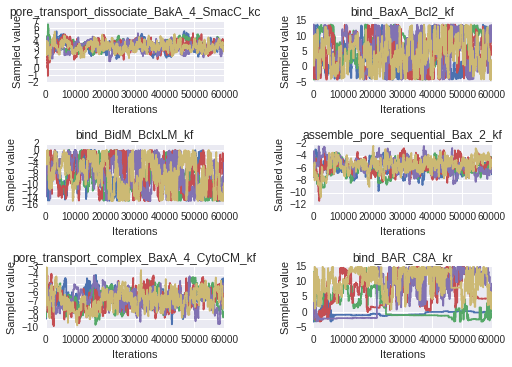

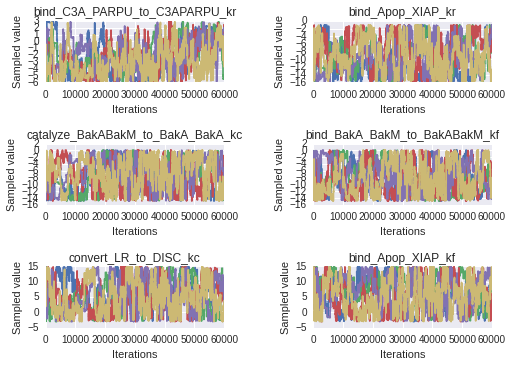

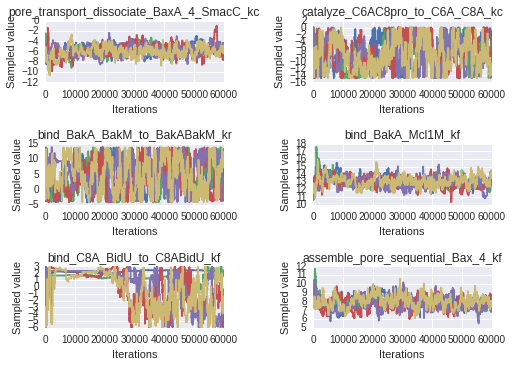

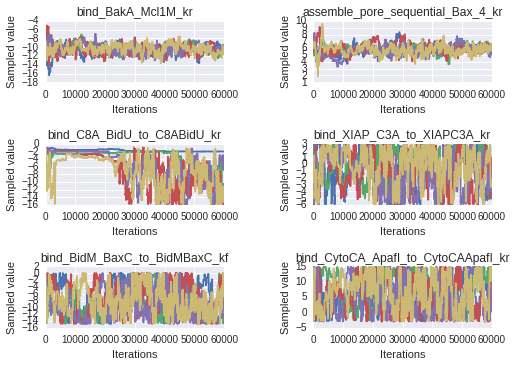

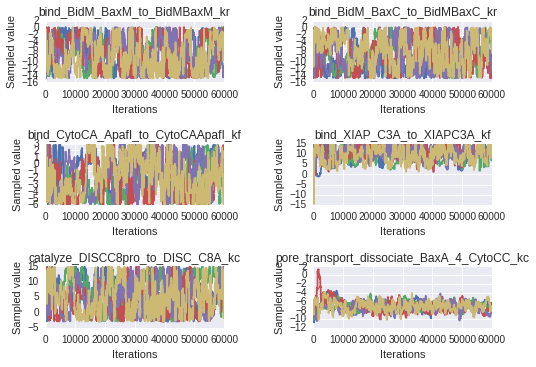

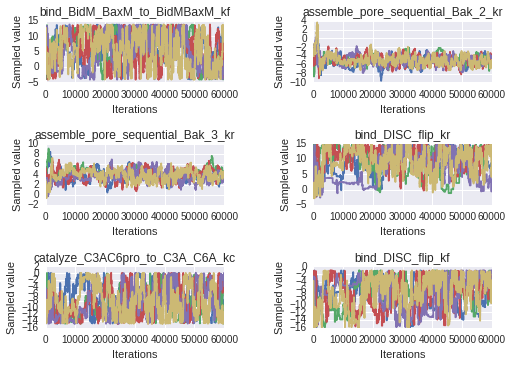

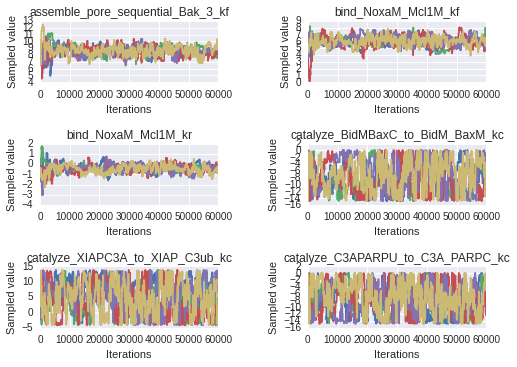

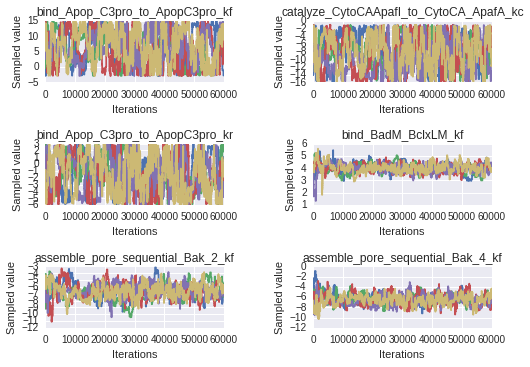

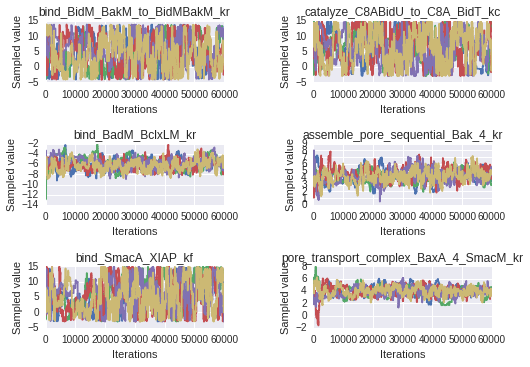

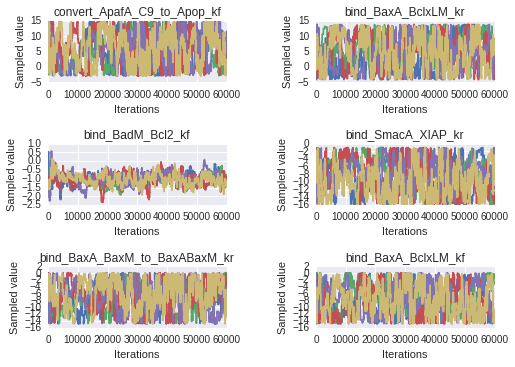

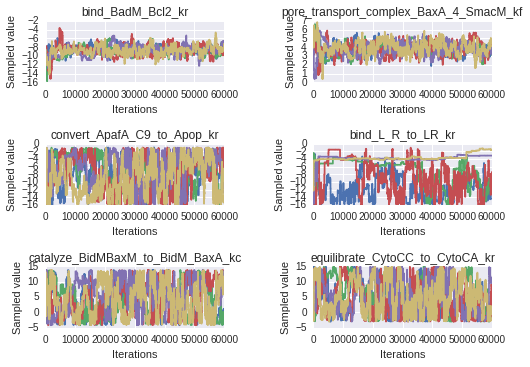

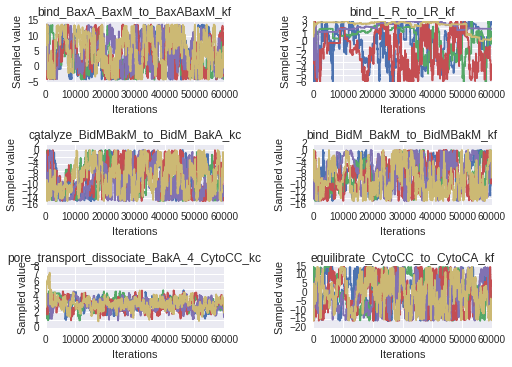

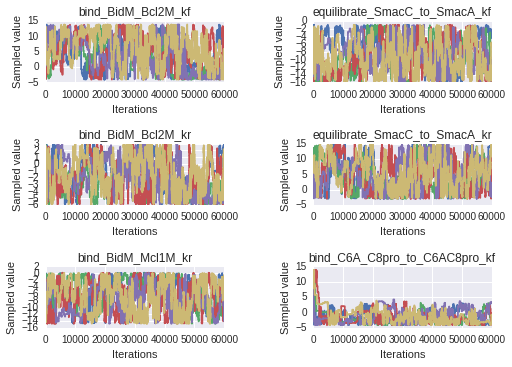

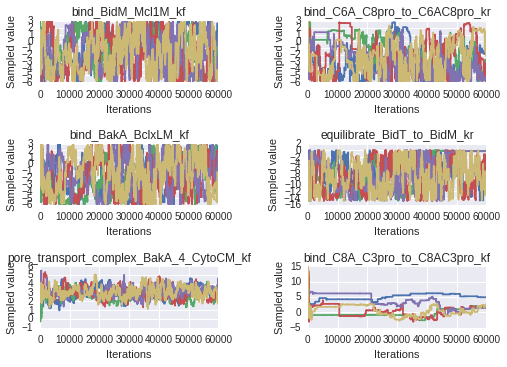

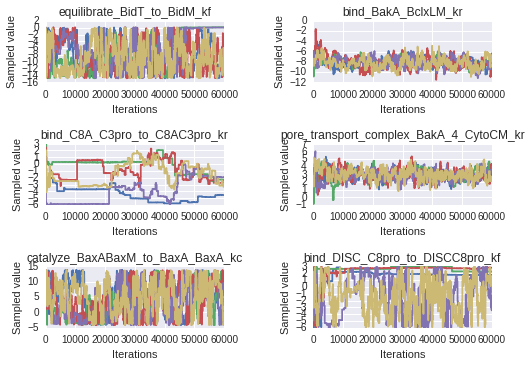

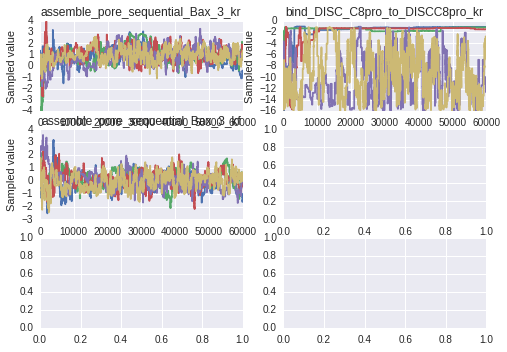

In [11]:
sample_plots(param_trace_dicts['a'])

In [12]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000)

In [13]:
trace_arrays = [trace_arr_a, trace_arr_b, trace_arr_c, trace_arr_d]

In [18]:
traces['a'][0][0][67::]

array([  0.37595285,   2.96821418, -11.03479127,   3.08123385,
        -3.70713158,  -9.24794972,  12.92633117,  -9.42010666,
        -1.20425941,  -9.71145264,   4.50758981,  -7.58052274,
         5.87665713,  -0.35743183,  -4.8665167 ,   2.36239389,
        -0.49709649,   1.37898096,   8.46412377,   6.05209961,
        -5.55547945,  -4.8248079 ,   8.82754303,   4.1472227 ,
        -6.41191097,   4.03330179,  -7.22678014,   2.63498172,
        -6.44175173,   3.74344693,   4.401009  ,  -5.4815327 ,
         3.6890752 ,   4.23574308,   4.17048348,   3.08390736,
        -5.1005849 ,   3.85288214])

/gpfs22/local/centos6/python2/2.7.8/x86_64/gcc46/nonet/lib/python2.7/site-packages/matplotlib-1.5.dev1-py2.7-linux-x86_64.egg/matplotlib/pyplot.py:423: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


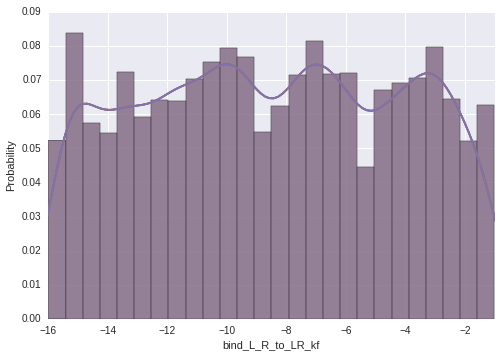

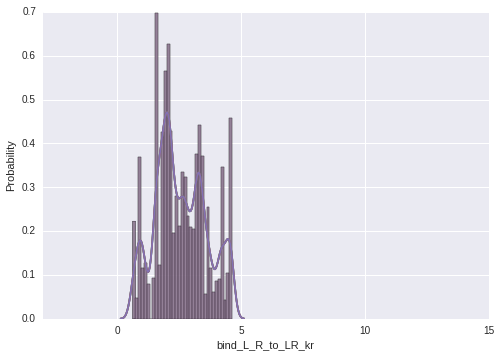

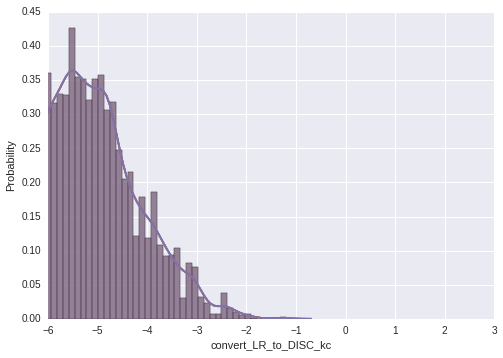

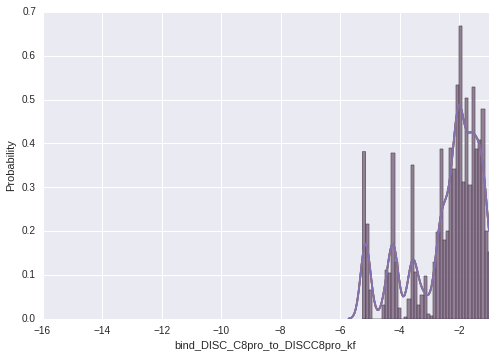

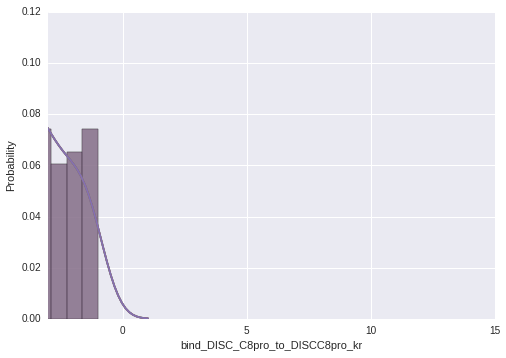

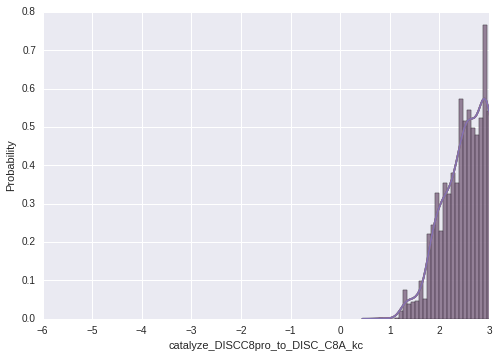

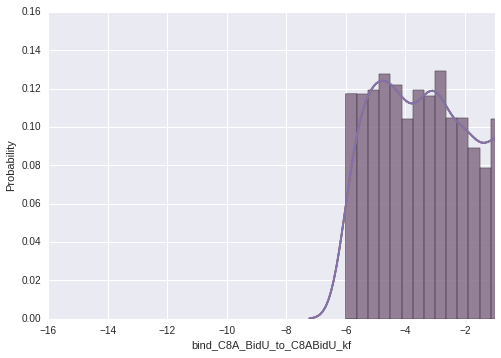

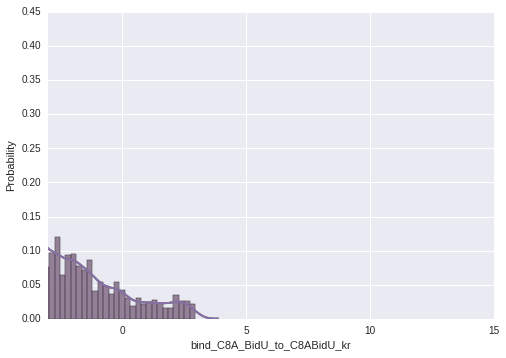

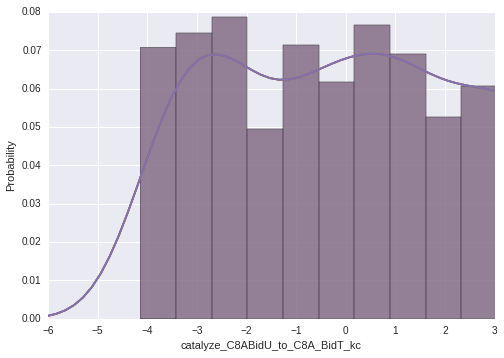

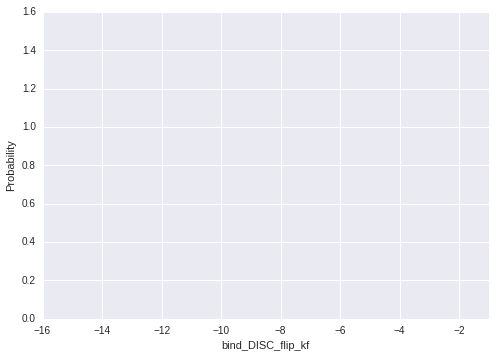

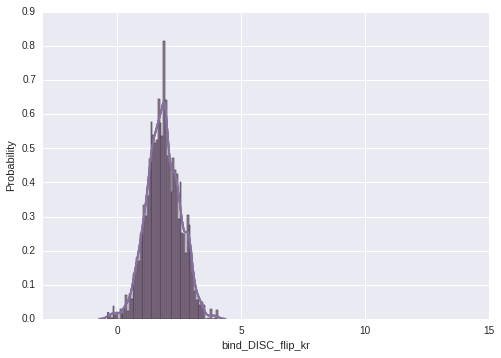

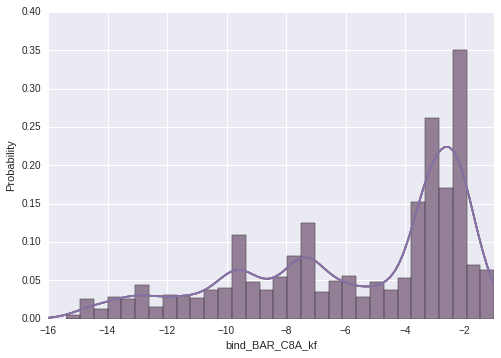

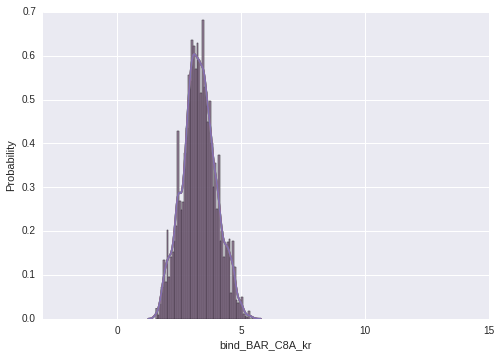

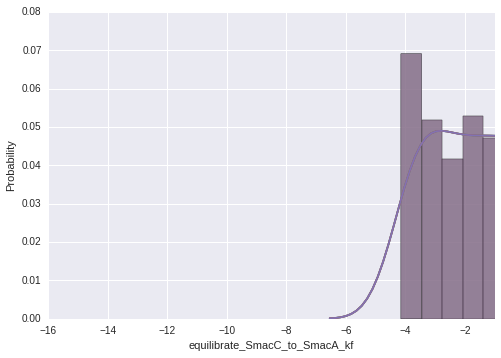

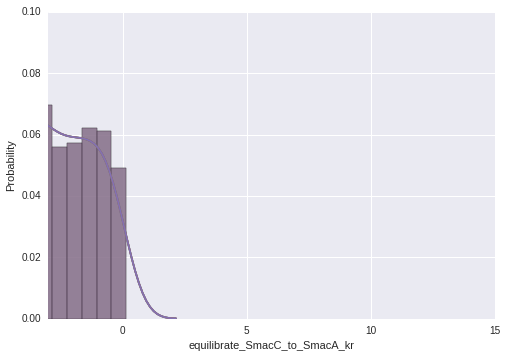

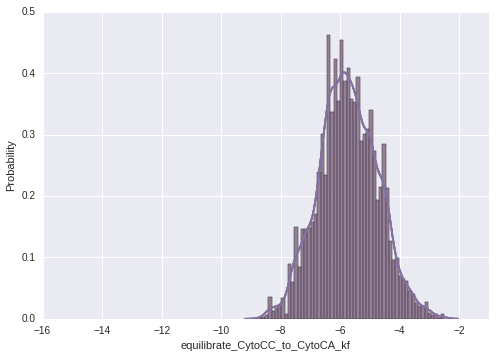

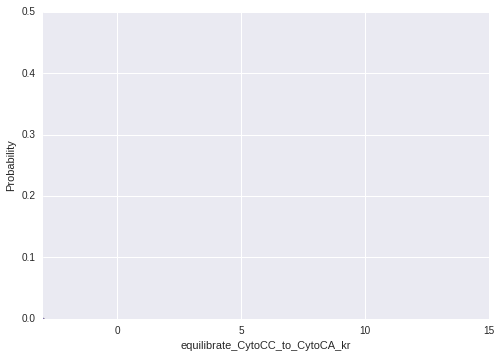

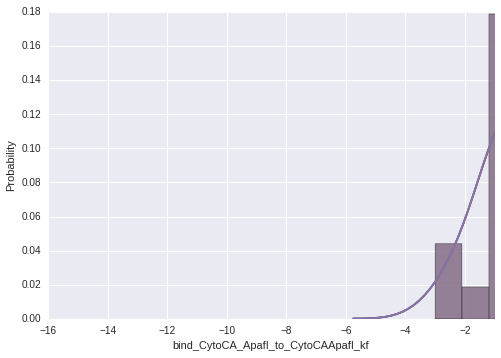

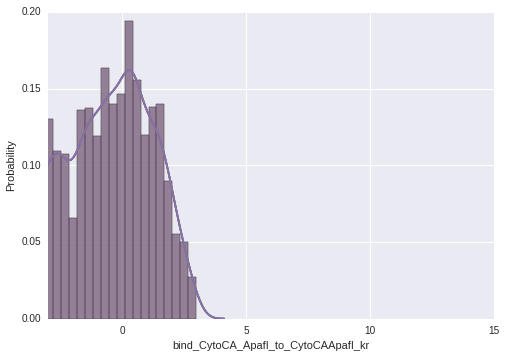

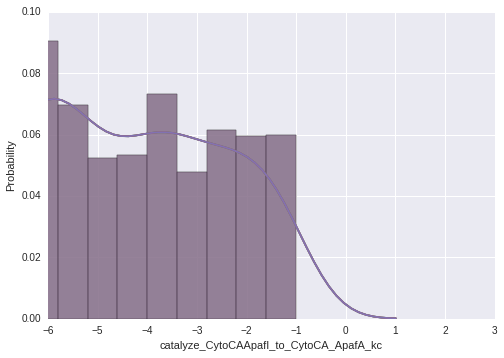

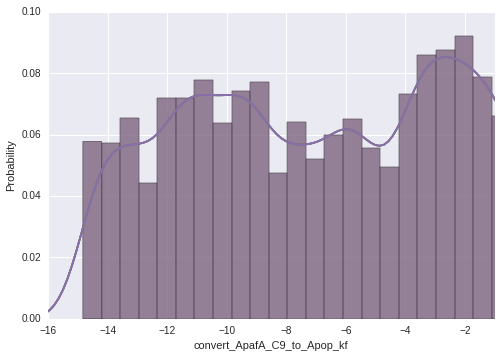

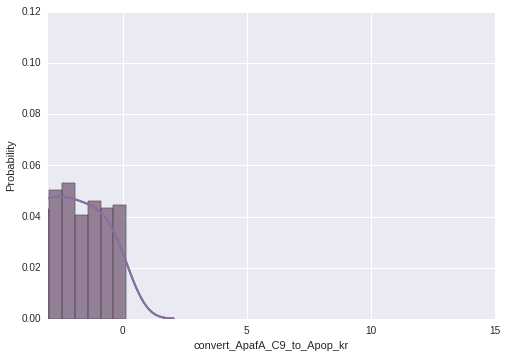

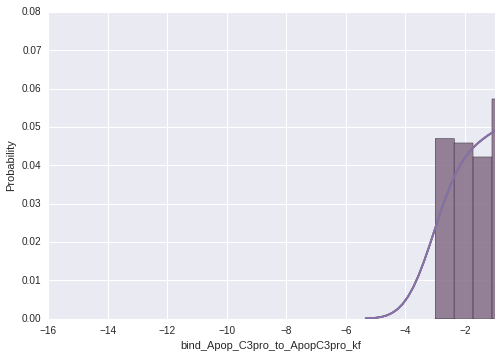

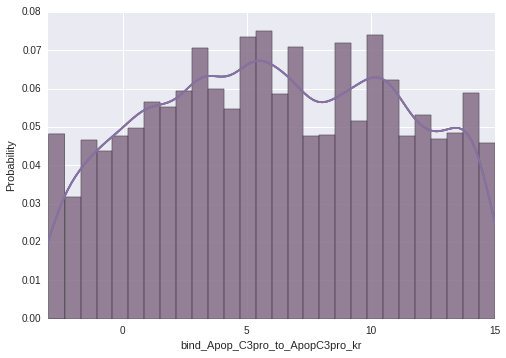

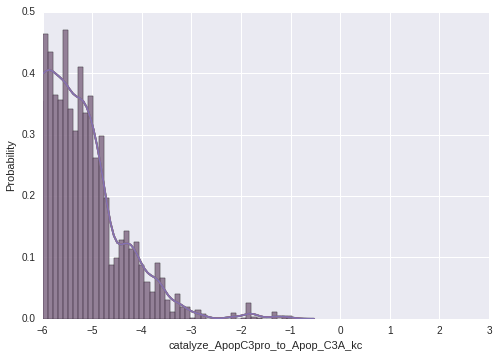

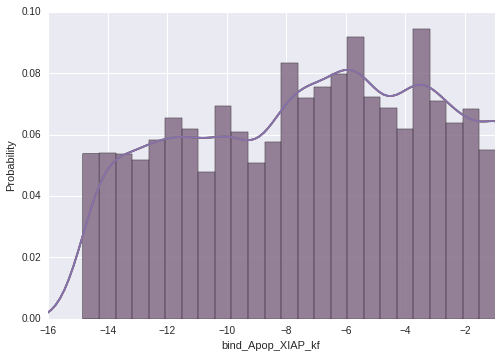

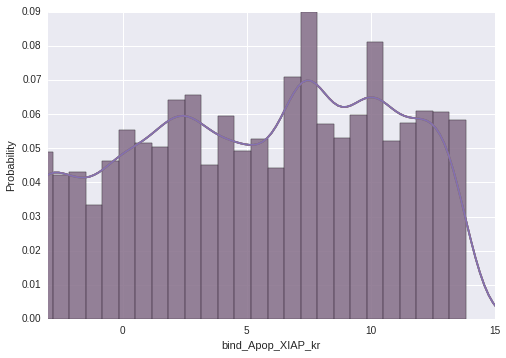

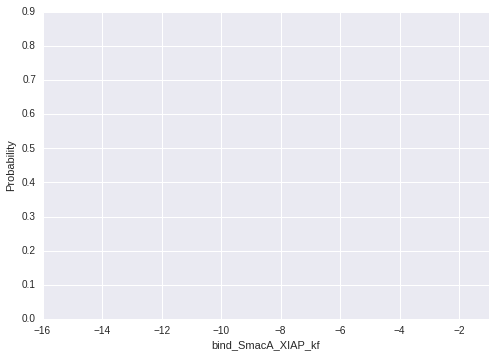

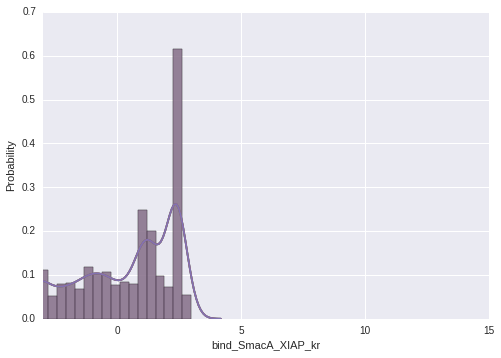

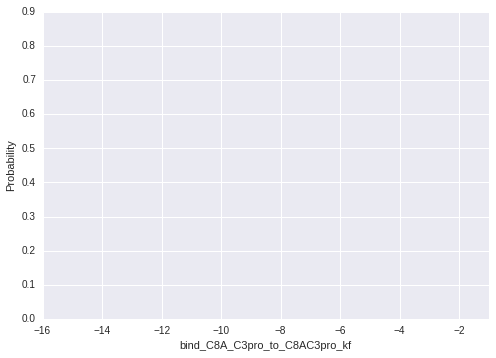

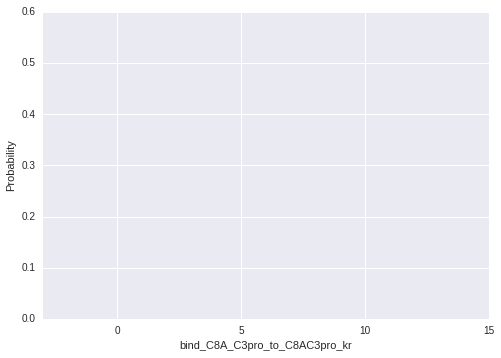

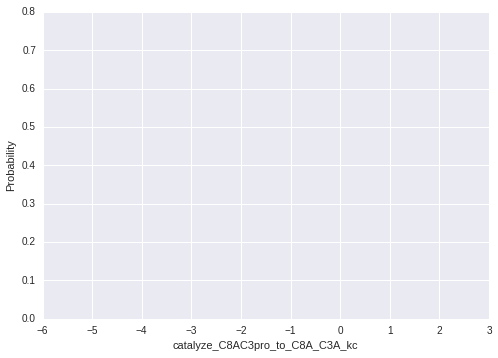

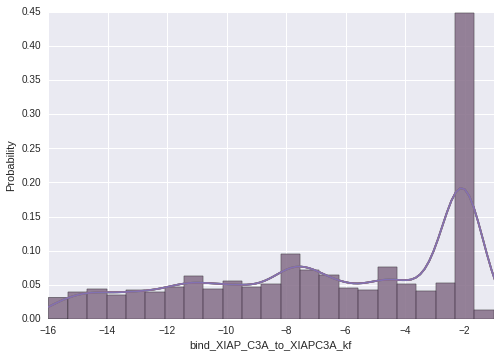

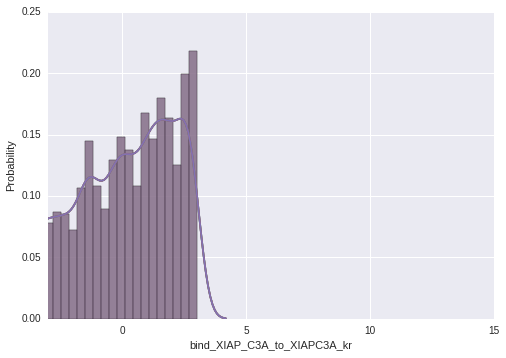

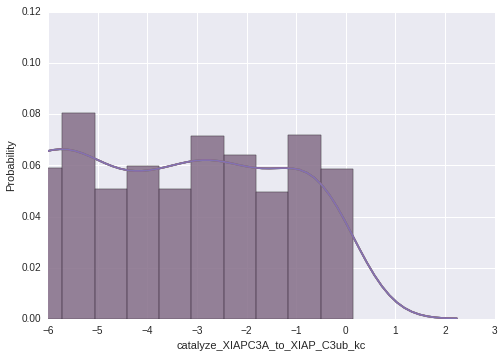

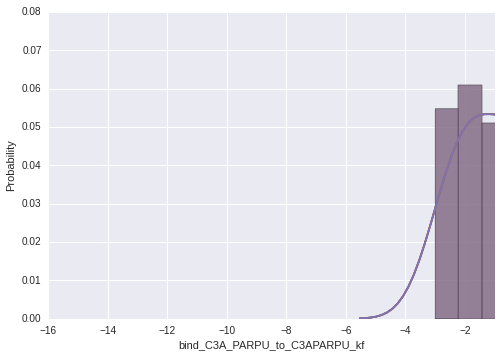

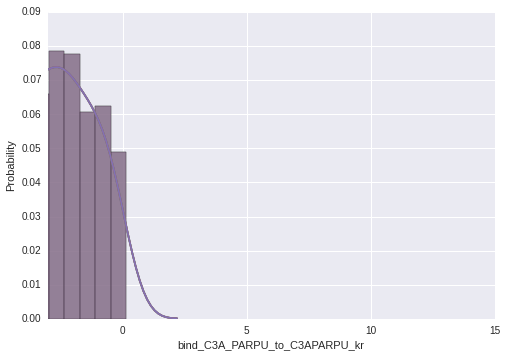

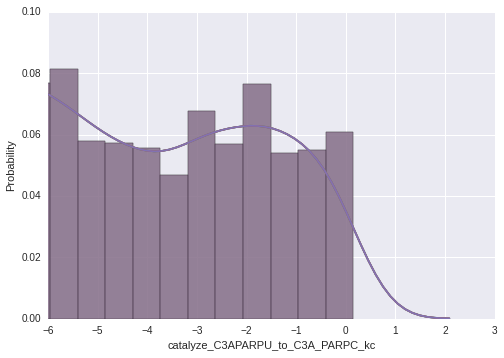

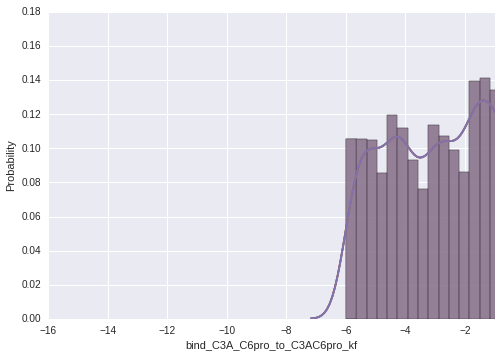

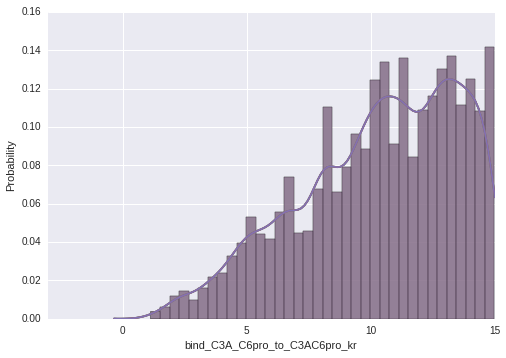

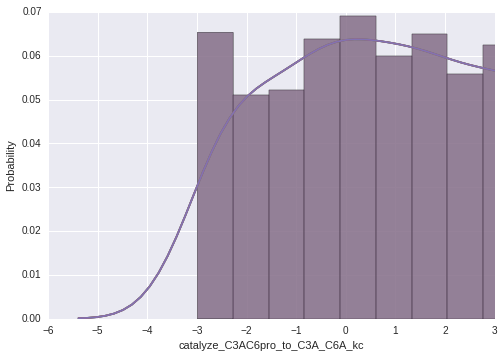

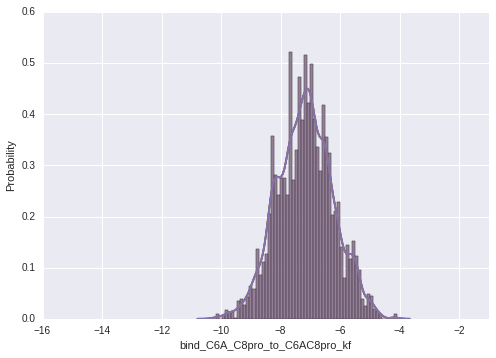

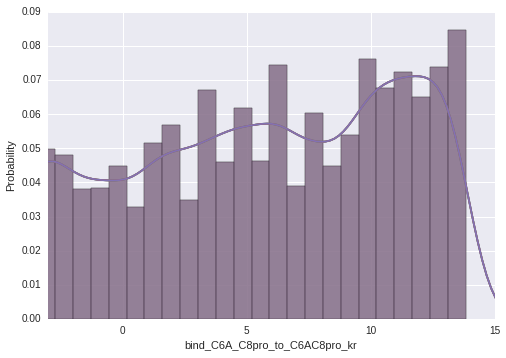

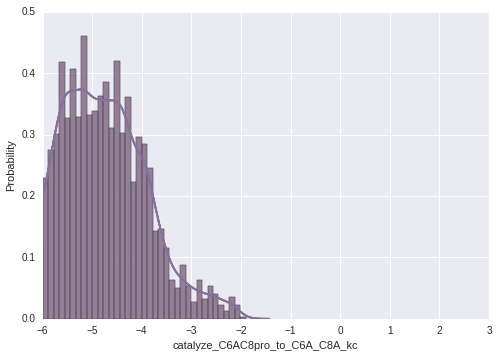

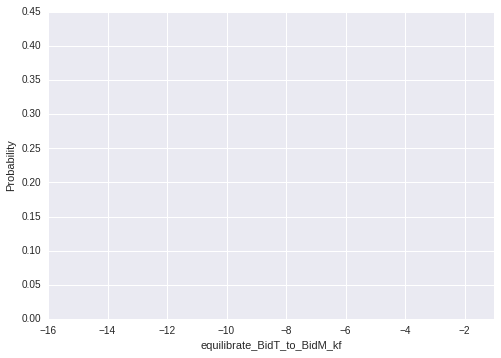

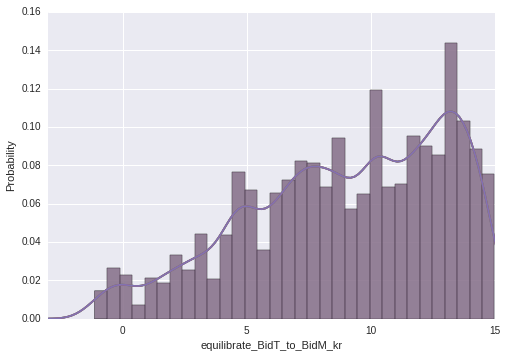

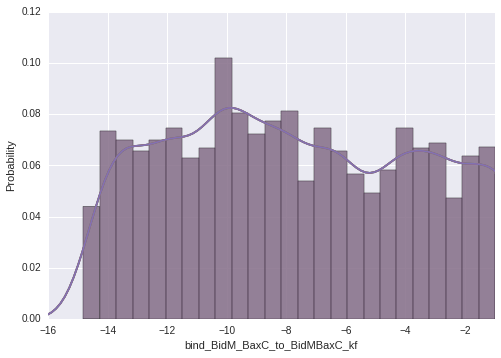

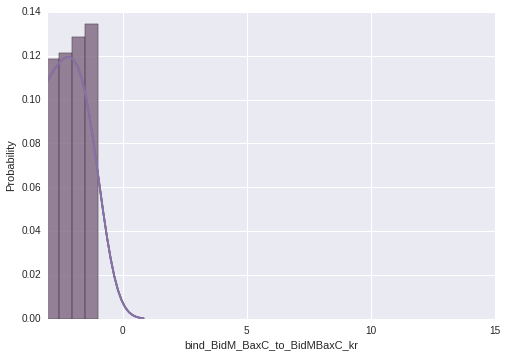

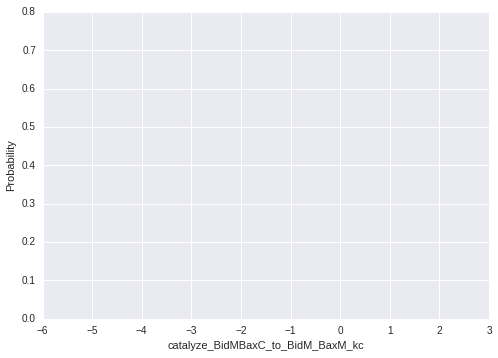

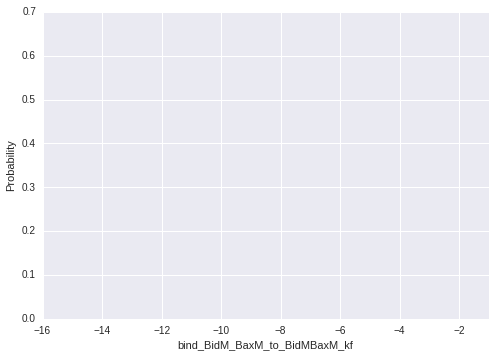

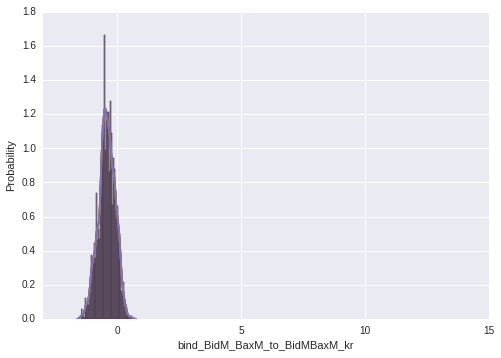

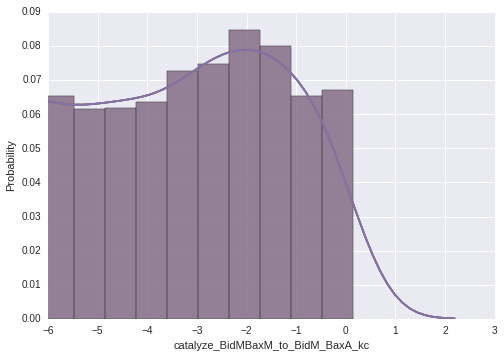

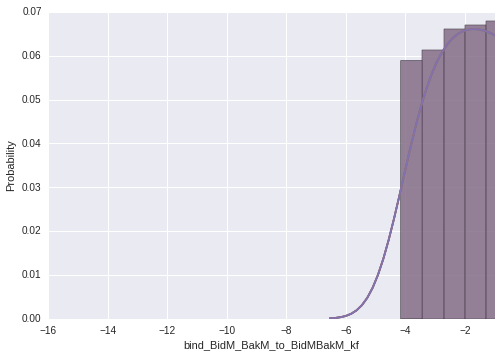

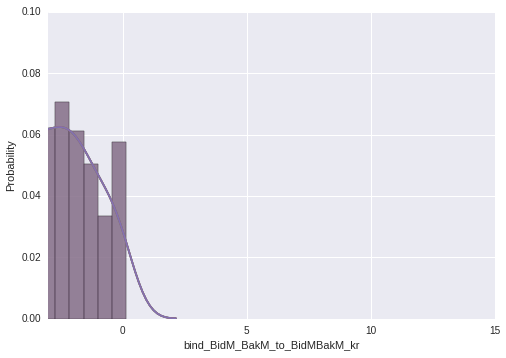

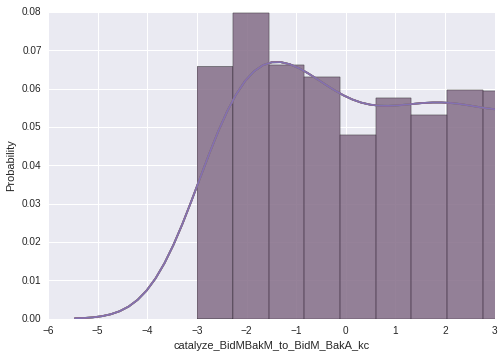

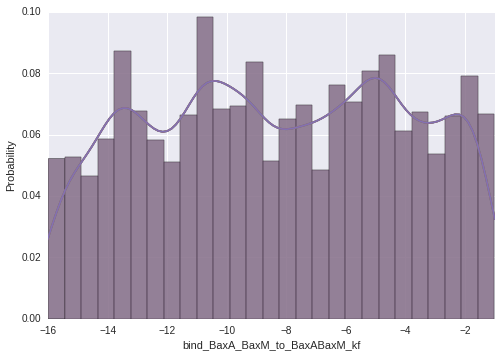

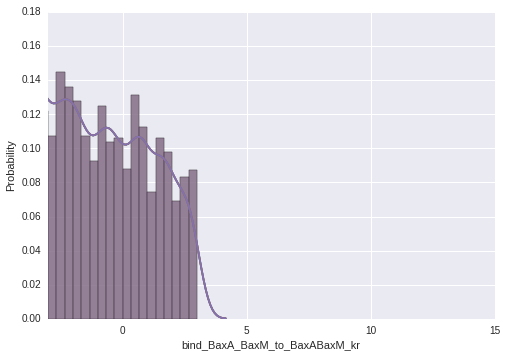

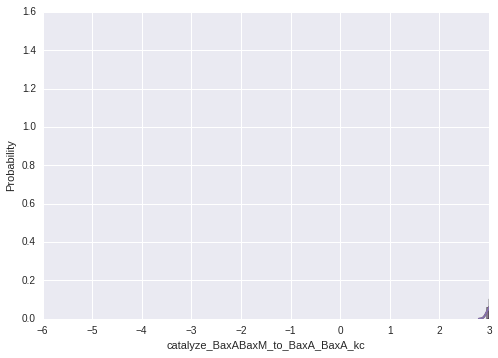

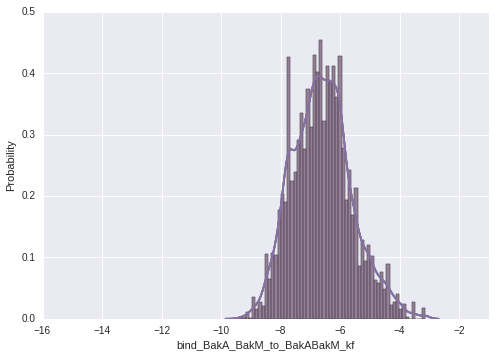

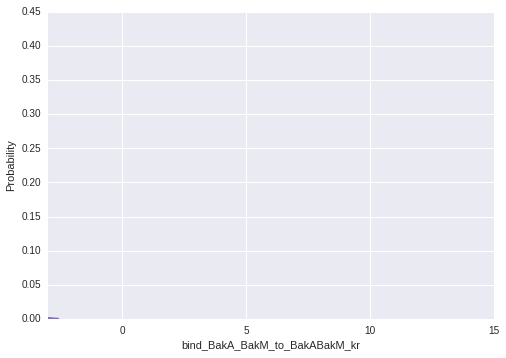

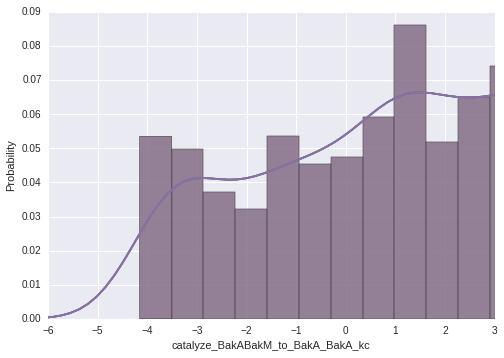

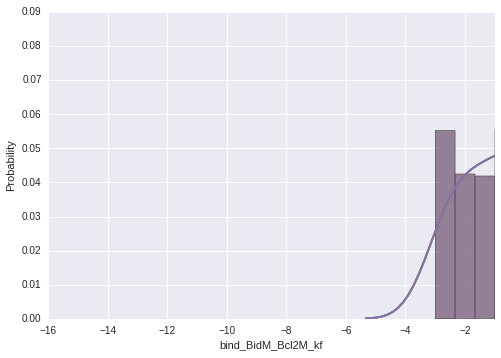

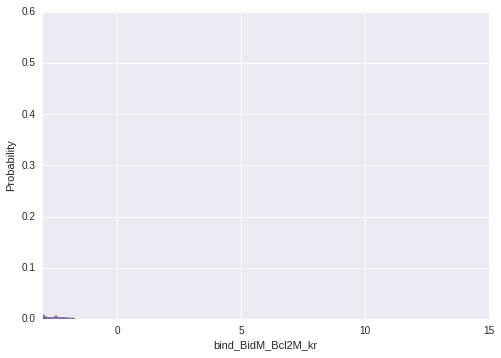

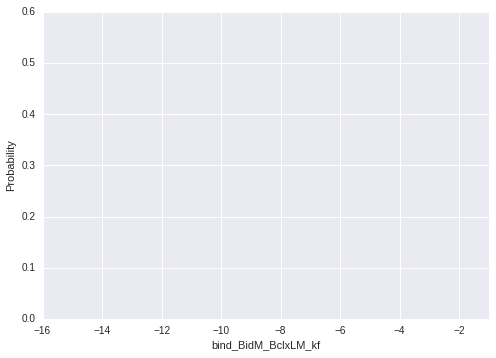

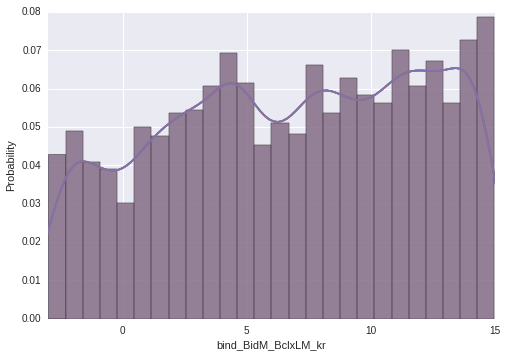

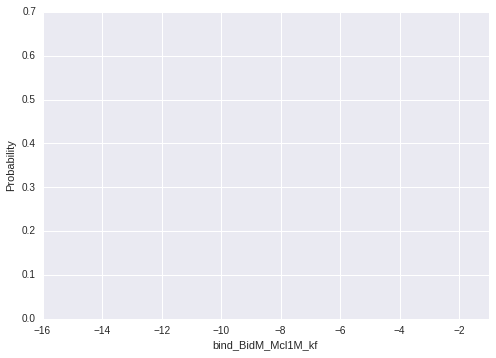

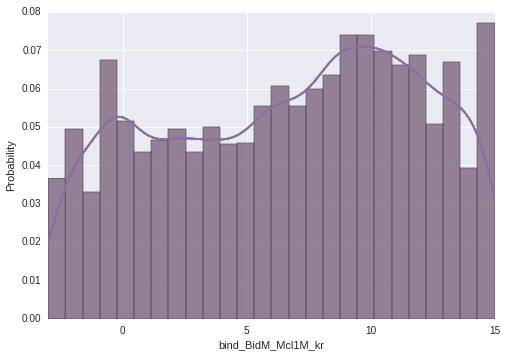

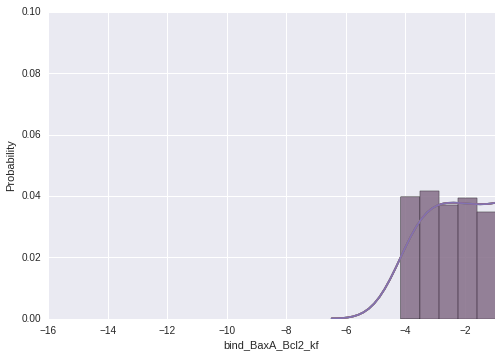

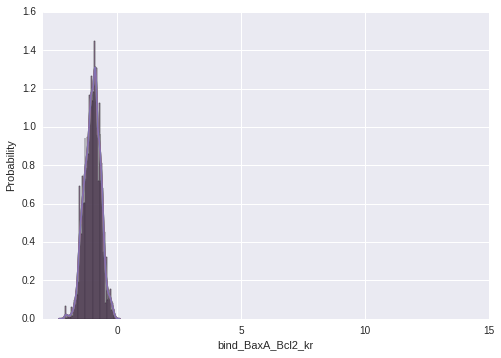

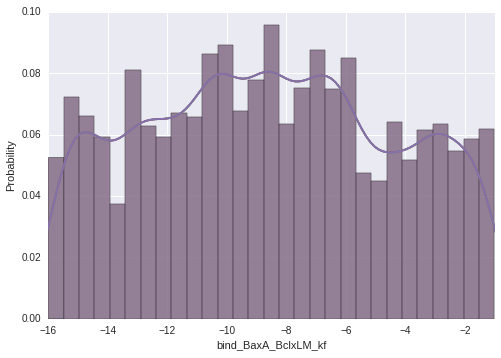

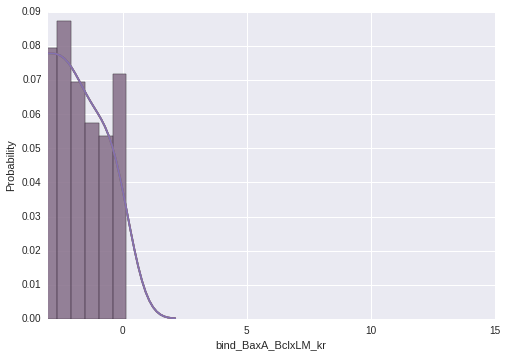

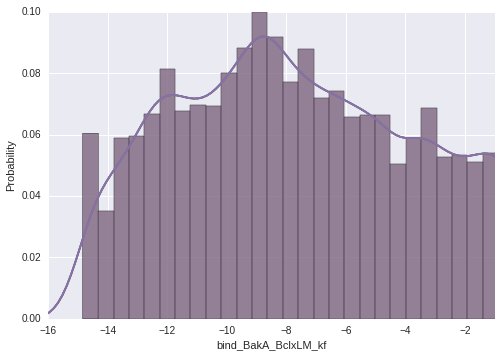

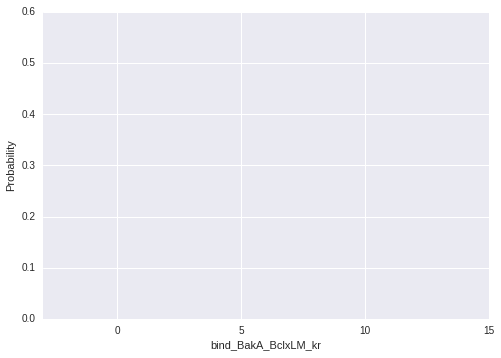

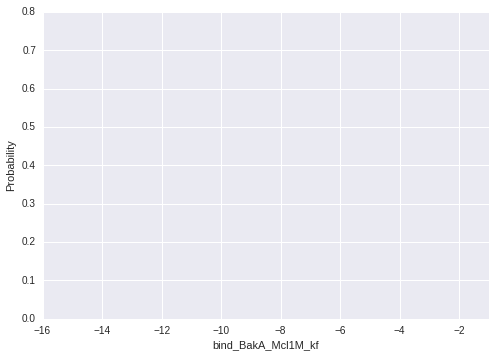

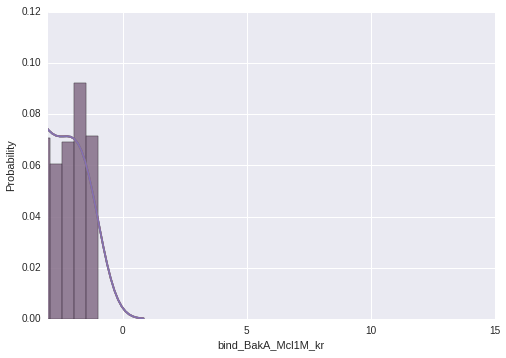

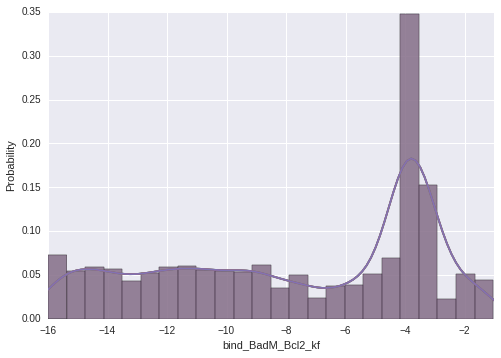

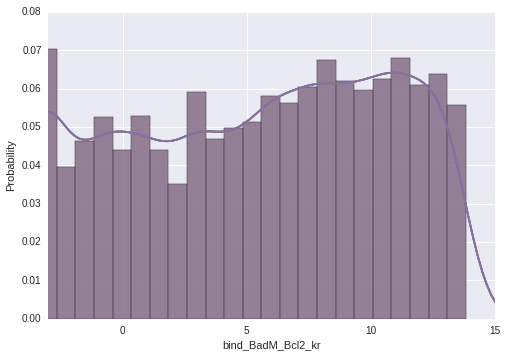

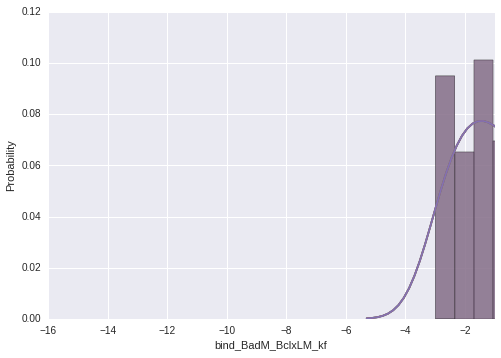

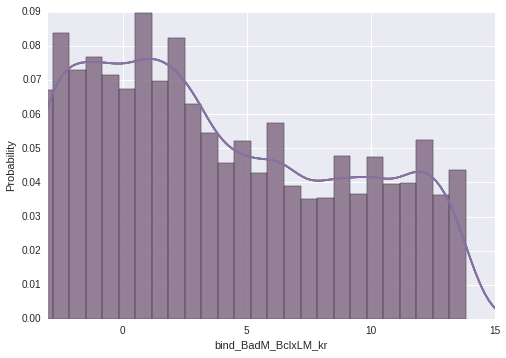

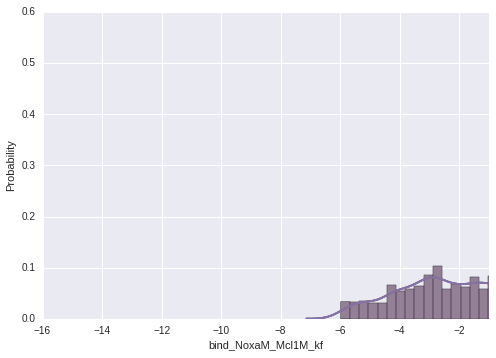

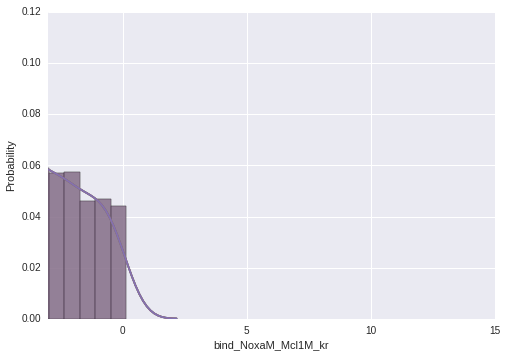

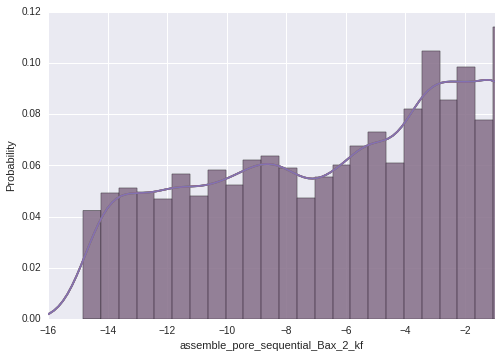

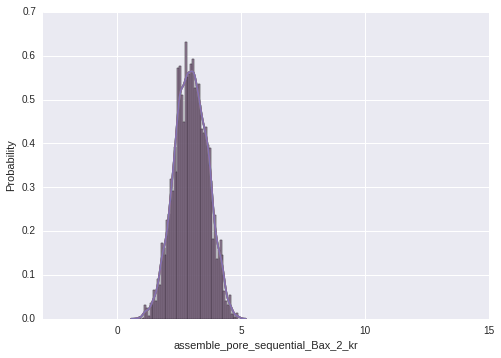

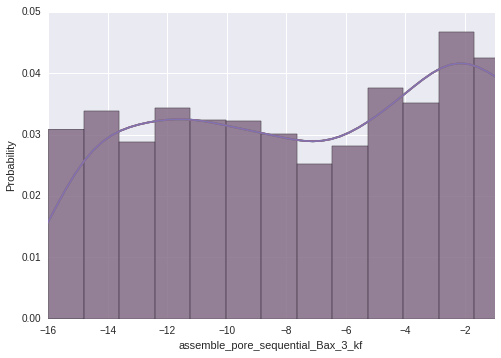

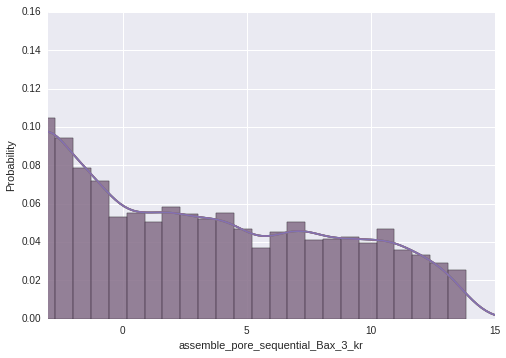

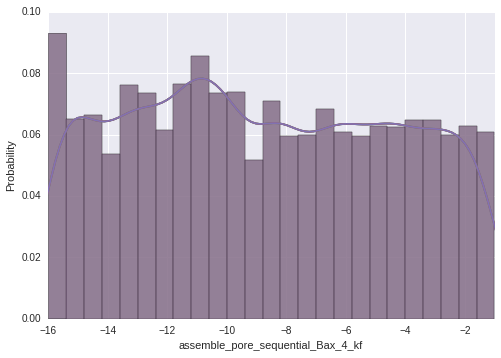

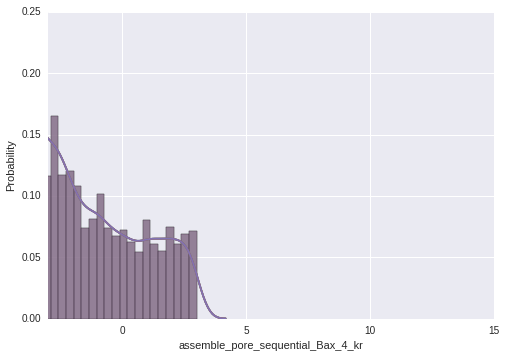

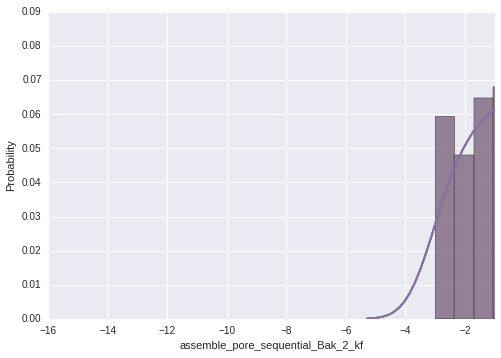

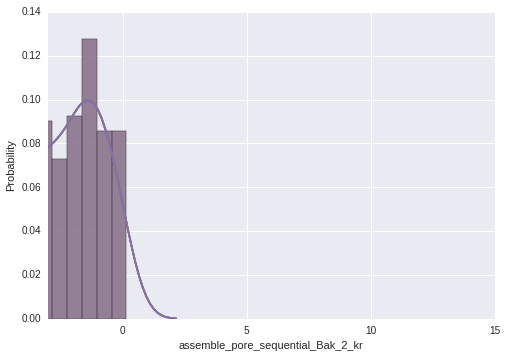

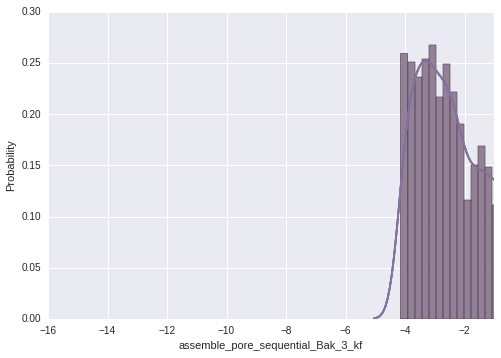

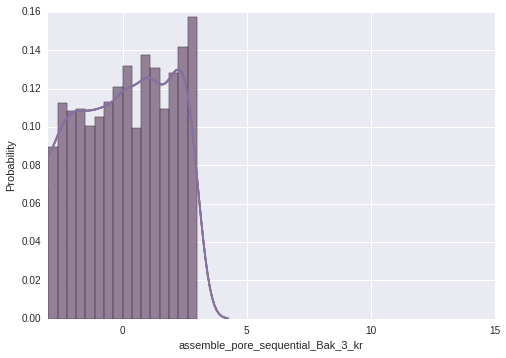

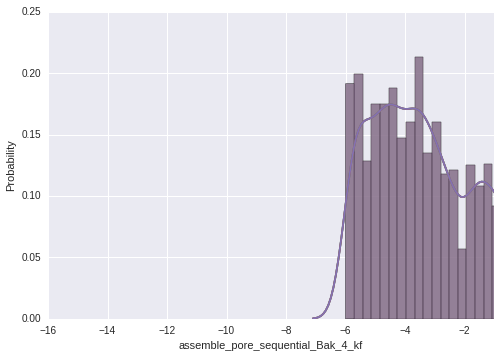

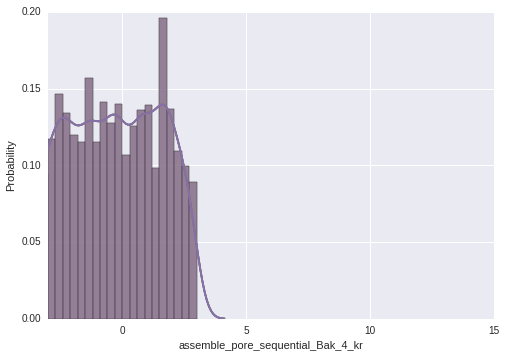

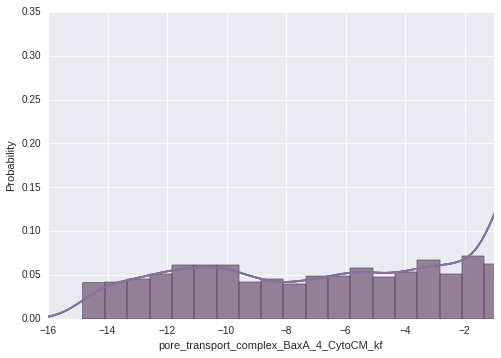

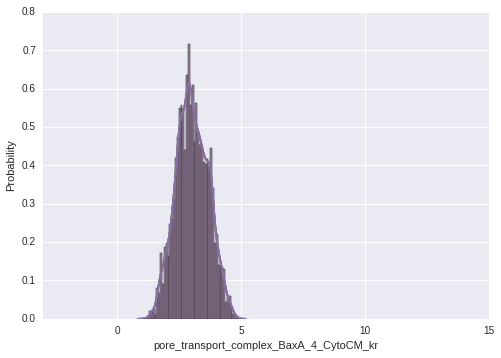

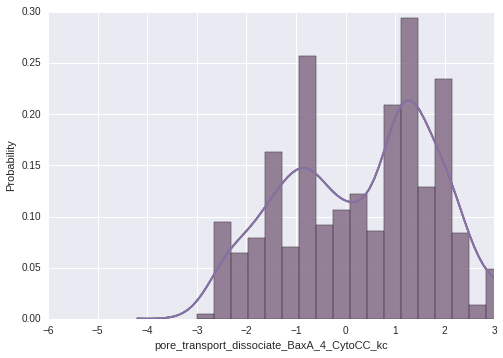

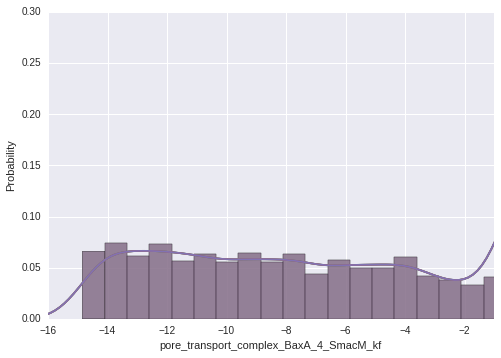

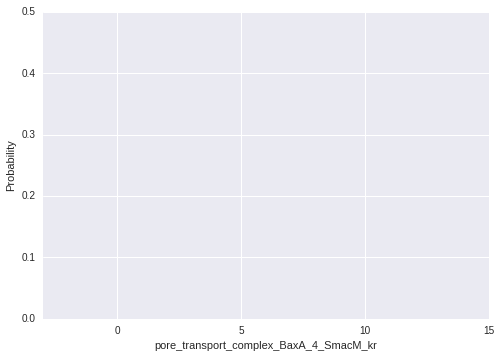

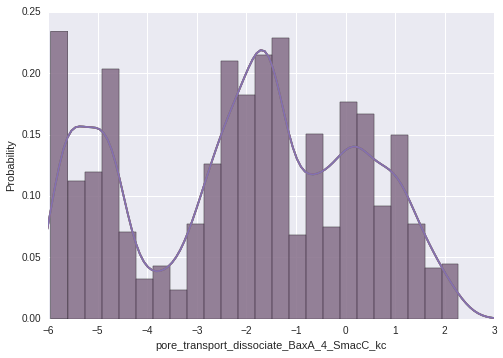

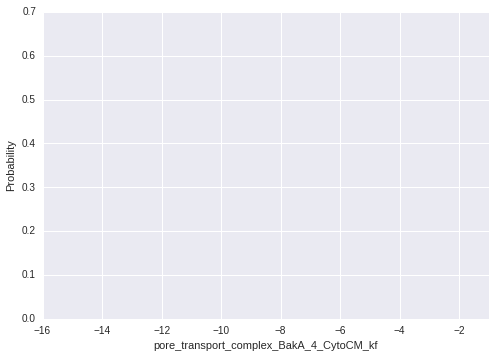

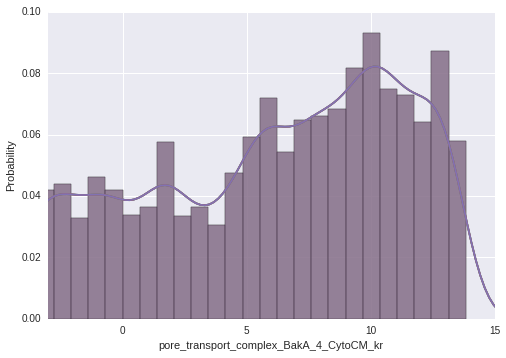

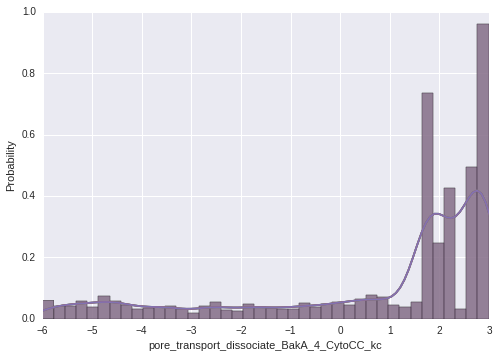

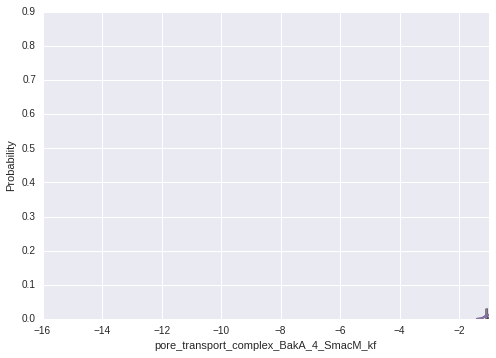

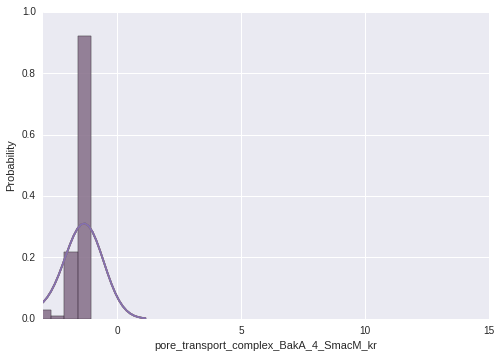

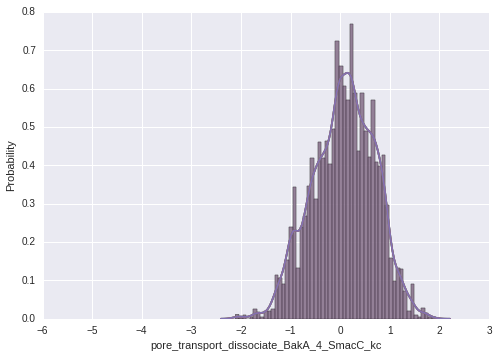

In [15]:
for dim, param_name in zip(range(len(trace_arr_a[0])), [param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True)
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    sns.axlabel(param_name, 'Probability')
    if 'kf' in param_name:
        ax.set_xlim([-16, -1])
    elif 'kr' in param_name:
        ax.set_xlim([-3, 15])
    elif 'kc' in param_name:
        ax.set_xlim([-6, 3])

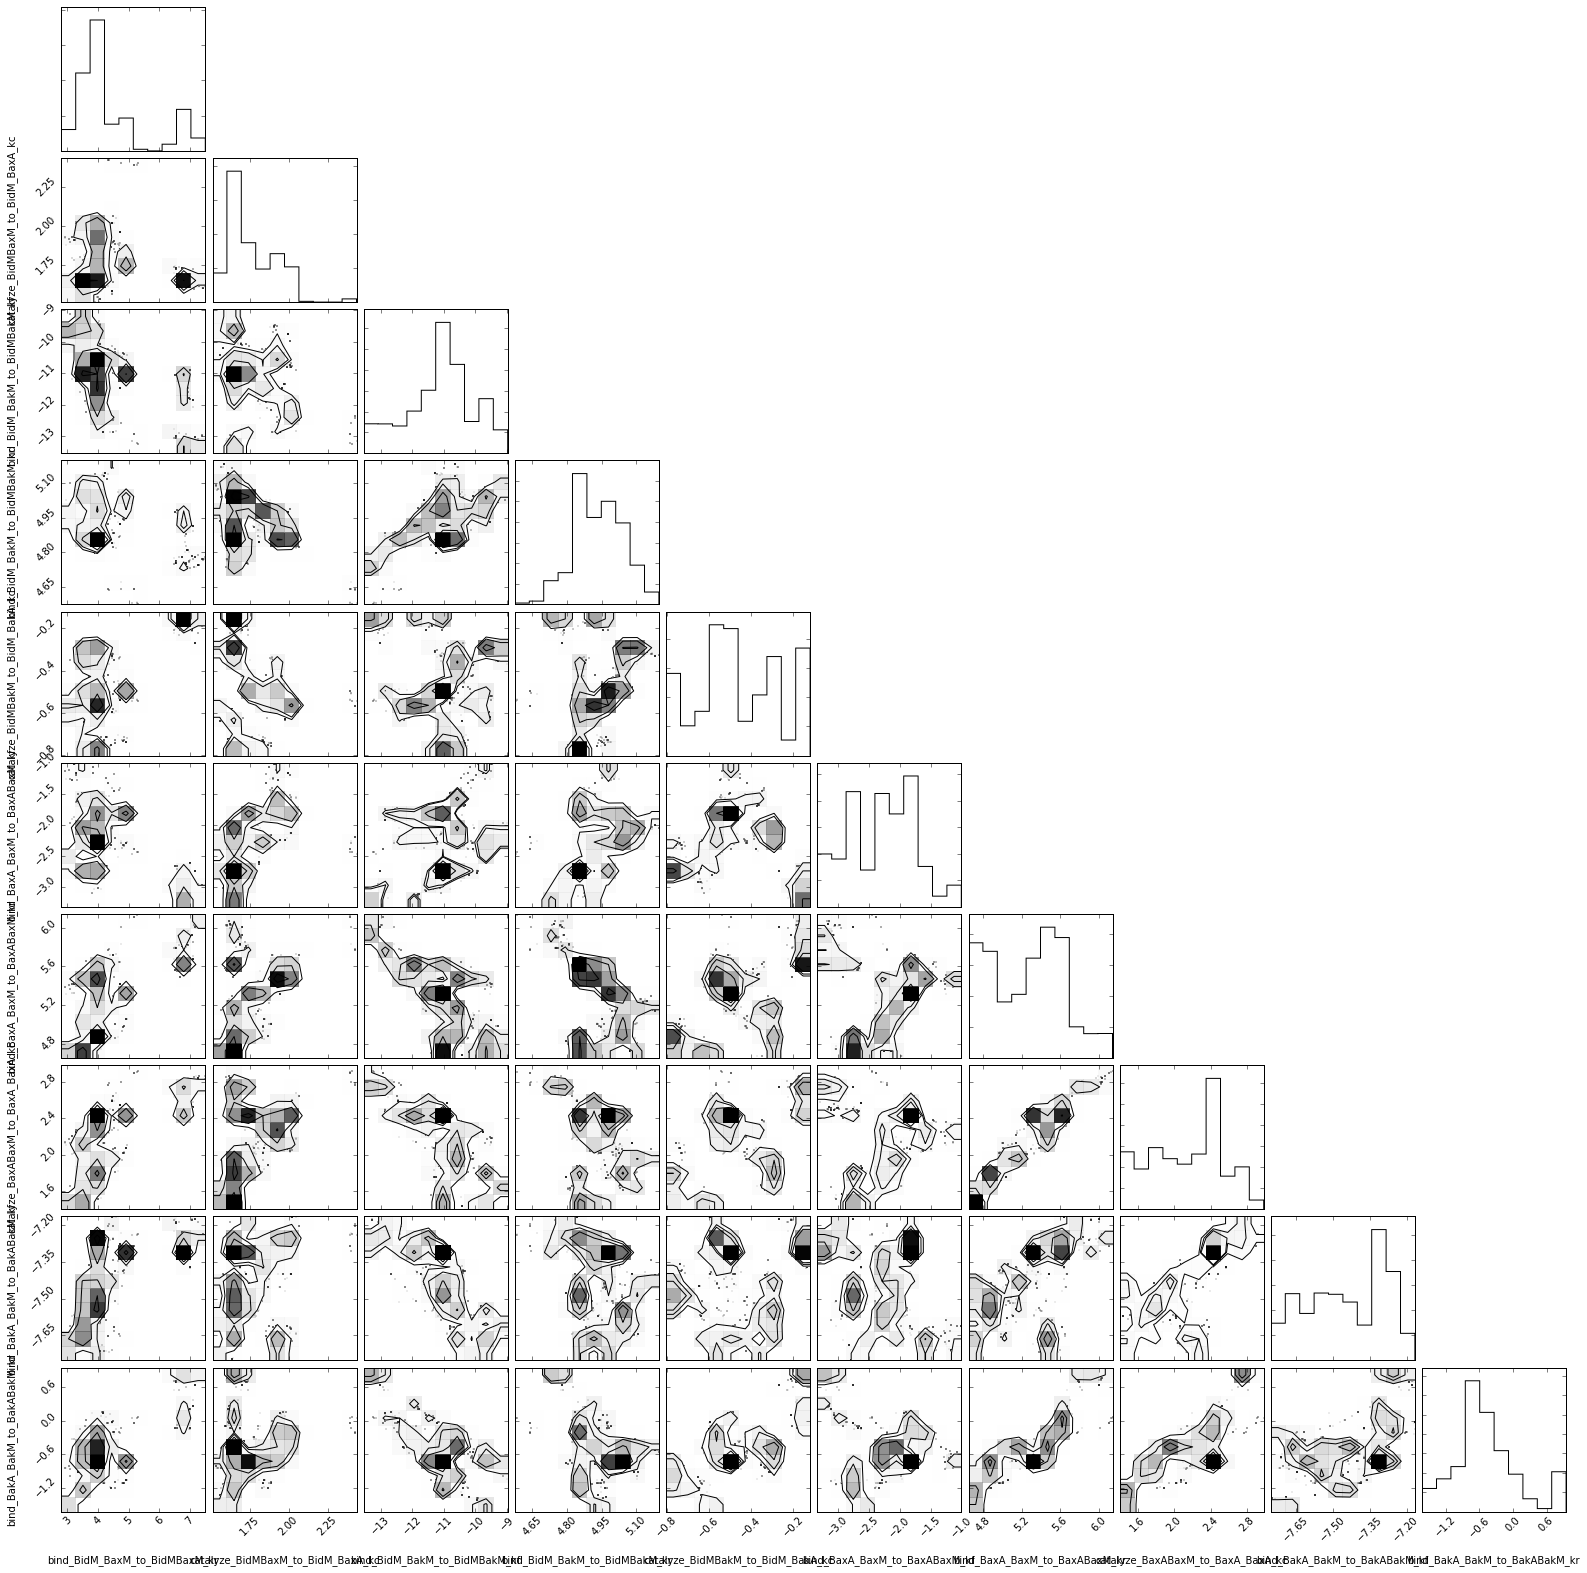

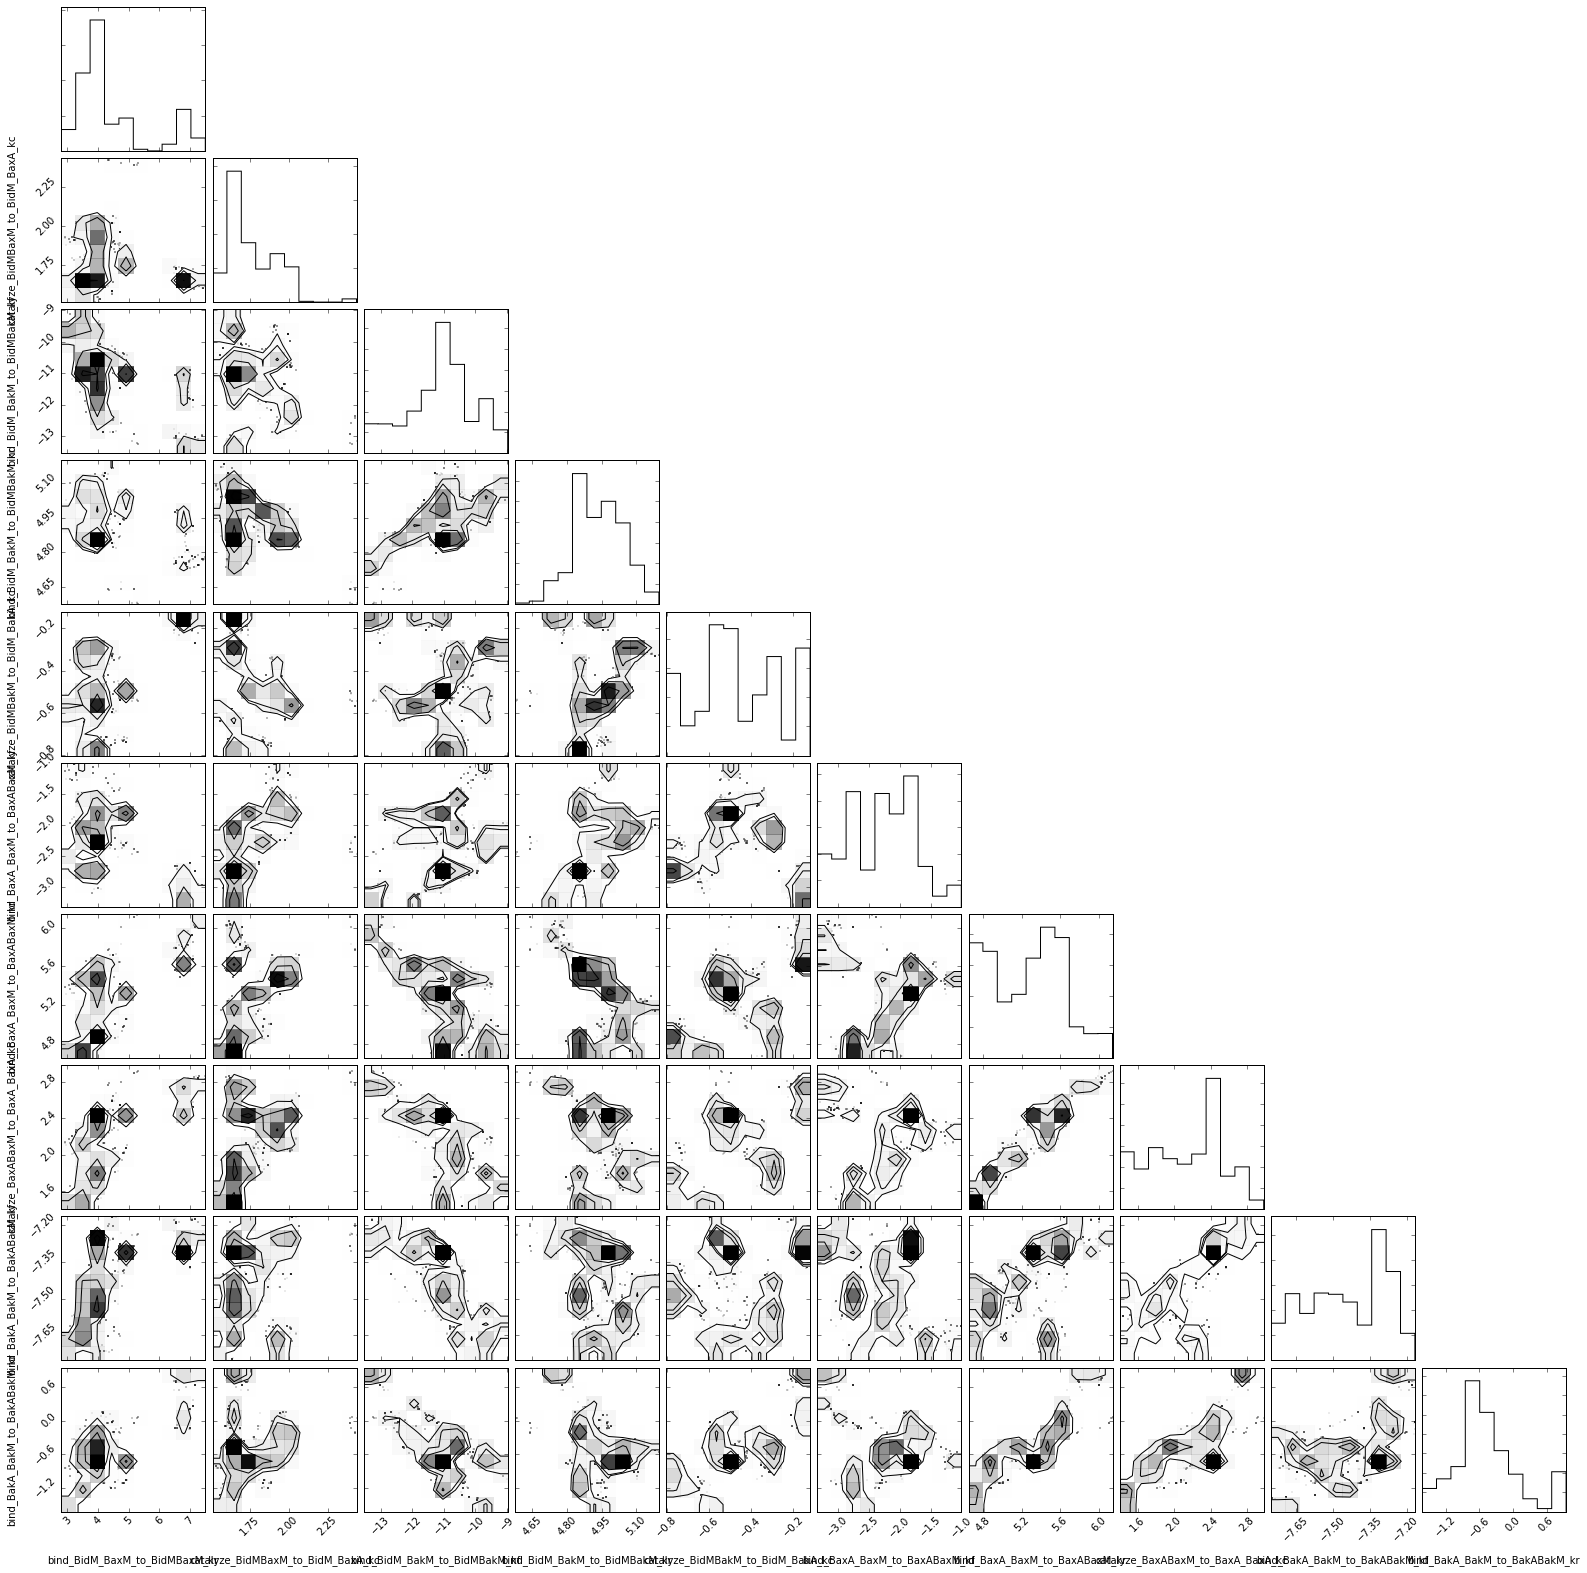

In [16]:
corner(trace_arr_a[:,50:60:], labels=param_trace_a['param_list'][50:60], bins=10)